<a href="https://colab.research.google.com/github/omerkasapci/Fetch-DA-Take-Home-Challenge/blob/main/2_Data_Exploration_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SETTING UP THE ENVIRONMENT

In [ ]:
# import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
# upload data
products = pd.read_csv('PRODUCTS_TAKEHOME.csv')
transactions = pd.read_csv('TRANSACTION_TAKEHOME.csv')
users = pd.read_csv('USER_TAKEHOME.csv')

# PRODUCTS TABLE

In [ ]:
products.head(10)

,CATEGORY_1,CATEGORY_2,CATEGORY_3,CATEGORY_4,MANUFACTURER,BRAND,BARCODE
0,Health & Wellness,Sexual Health,Conductivity Gels & Lotions,NaN,NaN,NaN,7.964944e+11
1,Snacks,Puffed Snacks,Cheese Curls & Puffs,NaN,NaN,NaN,2.327801e+10
2,Health & Wellness,Hair Care,Hair Care Accessories,NaN,PLACEHOLDER MANUFACTURER,ELECSOP,4.618178e+11
3,Health & Wellness,Oral Care,Toothpaste,NaN,COLGATE-PALMOLIVE,COLGATE,3.500047e+10
4,Health & Wellness,Medicines & Treatments,Essential Oils,NaN,MAPLE HOLISTICS AND HONEYDEW PRODUCTS INTERCHA...,MAPLE HOLISTICS,8.068109e+11
5,Health & Wellness,Hair Care,Hair Care Accessories,NaN,PLACEHOLDER MANUFACTURER,BEAUHAIR,6.626585e+11
6,Health & Wellness,Medicines & Treatments,Vitamins & Herbal Supplements,NaN,HALEON,EMERGEN-C,6.177376e+11
7,Health & Wellness,Deodorant & Antiperspirant,Men's Deodorant & Antiperspirant,NaN,NaN,NaN,7.501839e+12
8,Snacks,Snack Bars,Granola Bars,NaN,HYVEE INC,HY-VEE,7.545013e+10
9,Health & Wellness,NaN,NaN,NaN,CHURCH & DWIGHT,REPHRESH,NaN


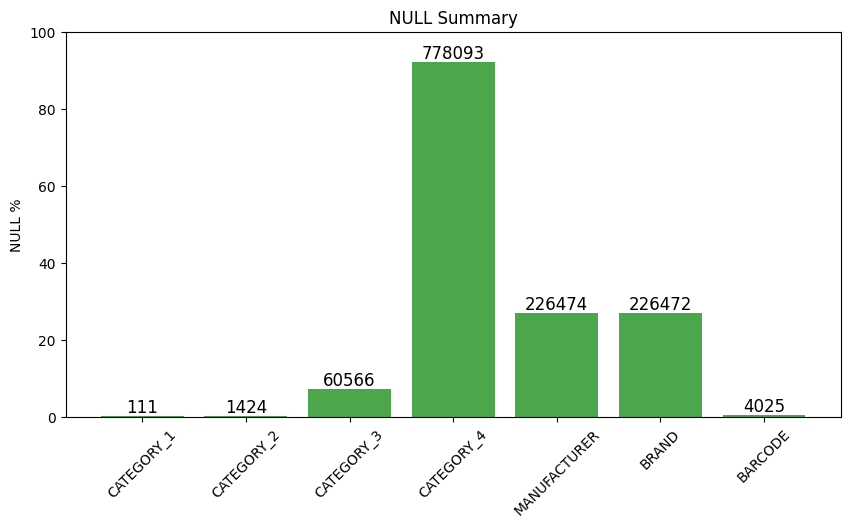

In [ ]:
# NULL Summary

# count the number of nulls and specify as a percentage for each column
null_counts = products.isnull().sum()
null_percentage = (null_counts / len(products)) * 100

# combine both into a DataFrame
null_summary = pd.DataFrame({'Null Count': null_counts, 'Percentage Missing': null_percentage})

# display results
plt.figure(figsize=(10, 5))
bars = plt.bar(null_summary.index, null_summary["Percentage Missing"], color="green", alpha=0.7)

# add labels for null counts on top of each bar
for bar, count in zip(bars, null_summary["Null Count"]):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f"{count}", ha='center', va='bottom', fontsize=12, color="black")

# set y-axis limit to 0-100
plt.ylim(0, 100)

plt.xticks(rotation=45)
plt.ylabel("NULL %")
plt.title("NULL Summary")
plt.show()

# TRANSACTIONS TABLE

In [ ]:
transactions.head(10)

,RECEIPT_ID,PURCHASE_DATE,SCAN_DATE,STORE_NAME,USER_ID,BARCODE,FINAL_QUANTITY,FINAL_SALE
0,0000d256-4041-4a3e-adc4-5623fb6e0c99,2024-08-21,2024-08-21 14:19:06.539 Z,WALMART,63b73a7f3d310dceeabd4758,1.530001e+10,1.00,
1,0001455d-7a92-4a7b-a1d2-c747af1c8fd3,2024-07-20,2024-07-20 09:50:24.206 Z,ALDI,62c08877baa38d1a1f6c211a,NaN,zero,1.49
2,00017e0a-7851-42fb-bfab-0baa96e23586,2024-08-18,2024-08-19 15:38:56.813 Z,WALMART,60842f207ac8b7729e472020,7.874223e+10,1.00,
3,000239aa-3478-453d-801e-66a82e39c8af,2024-06-18,2024-06-19 11:03:37.468 Z,FOOD LION,63fcd7cea4f8442c3386b589,7.833997e+11,zero,3.49
4,00026b4c-dfe8-49dd-b026-4c2f0fd5c6a1,2024-07-04,2024-07-05 15:56:43.549 Z,RANDALLS,6193231ae9b3d75037b0f928,4.790050e+10,1.00,
5,0002d8cd-1701-4cdd-a524-b70402e2dbc0,2024-06-24,2024-06-24 19:44:54.247 Z,WALMART,5dcc6c510040a012b8e76924,6.811314e+11,zero,1.46
6,000550b2-1480-4c07-950f-ff601f242152,2024-07-06,2024-07-06 19:27:48.586 Z,WALMART,5f850bc9cf9431165f3ac175,4.920091e+10,1.00,
7,00096c49-8b04-42f9-88ce-941c5e06c4a7,2024-08-19,2024-08-21 17:35:21.902 Z,TARGET,6144f4f1f3ef696919f54b5c,7.830007e+10,zero,3.59
8,000e1d35-15e5-46c6-b6b3-33653ed3d27e,2024-08-13,2024-08-13 18:21:07.931 Z,WALMART,61a6d926f998e47aad33db66,5.200001e+10,1.00,
9,0010d87d-1ad2-4e5e-9a25-cec736919d15,2024-08-04,2024-08-04 18:01:47.787 Z,ALDI,66686fc2e04f743a096ea808,NaN,zero,2.29


In [ ]:
transactions["FINAL_QUANTITY"].unique()

array(['1.00', 'zero', '2.00', '3.00', '4.00', '4.55', '2.83', '2.34',
       '0.46', '7.00', '18.00', '12.00', '5.00', '2.17', '0.23', '8.00',
       '1.35', '0.09', '2.58', '1.47', '16.00', '0.62', '1.24', '1.40',
       '0.51', '0.53', '1.69', '6.00', '2.39', '2.60', '10.00', '0.86',
       '1.54', '1.88', '2.93', '1.28', '0.65', '2.89', '1.44', '2.75',
       '1.81', '276.00', '0.87', '2.10', '3.33', '2.54', '2.20', '1.93',
       '1.34', '1.13', '2.19', '0.83', '2.61', '0.28', '1.50', '0.97',
       '0.24', '1.18', '6.22', '1.22', '1.23', '2.57', '1.07', '2.11',
       '0.48', '9.00', '3.11', '1.08', '5.53', '1.89', '0.01', '2.18',
       '1.99', '0.04', '2.25', '1.37', '3.02', '0.35', '0.99', '1.80',
       '3.24', '0.94', '2.04', '3.69', '0.70', '2.52', '2.27'],
      dtype=object)

In [ ]:
# convert 'zero' to 0 in FINAL_QUANTITY column
transactions['FINAL_QUANTITY'] = transactions['FINAL_QUANTITY'].replace('zero', 0)

In [ ]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   RECEIPT_ID      50000 non-null  object 
 1   PURCHASE_DATE   50000 non-null  object 
 2   SCAN_DATE       50000 non-null  object 
 3   STORE_NAME      50000 non-null  object 
 4   USER_ID         50000 non-null  object 
 5   BARCODE         44238 non-null  float64
 6   FINAL_QUANTITY  50000 non-null  object 
 7   FINAL_SALE      50000 non-null  object 
dtypes: float64(1), object(7)
memory usage: 3.1+ MB


In [ ]:
# converting data types

# SCAN_DATE to datetime
transactions['SCAN_DATE'] = pd.to_datetime(transactions['SCAN_DATE'], errors='coerce')

# BARCODE to integer
transactions['BARCODE'] = pd.to_numeric(transactions['BARCODE'], errors='coerce').astype('Int64')

# FINAL_SALE to float
transactions['FINAL_SALE'] = pd.to_numeric(transactions['FINAL_SALE'], errors='coerce')

# FINAL_QUANTITY to float
transactions['FINAL_QUANTITY'] = pd.to_numeric(transactions['FINAL_QUANTITY'], errors='coerce')

# Verify changes
print(transactions.dtypes)

RECEIPT_ID                     object
PURCHASE_DATE                  object
SCAN_DATE         datetime64[ns, UTC]
STORE_NAME                     object
USER_ID                        object
BARCODE                         Int64
FINAL_QUANTITY                float64
FINAL_SALE                    float64
dtype: object


In [ ]:
transactions.describe()

,BARCODE,FINAL_QUANTITY,FINAL_SALE
count,44238.0,50000.000000,37500.000000
mean,171586277300.799622,0.814427,4.576384
std,326921916871.516663,1.841794,6.625663
min,-1.0,0.000000,0.000000
25%,30772115796.25,0.007500,1.790000
50%,52100038285.0,1.000000,3.000000
75%,85367648848.0,1.000000,5.190000
max,9347108002132.0,276.000000,462.820000


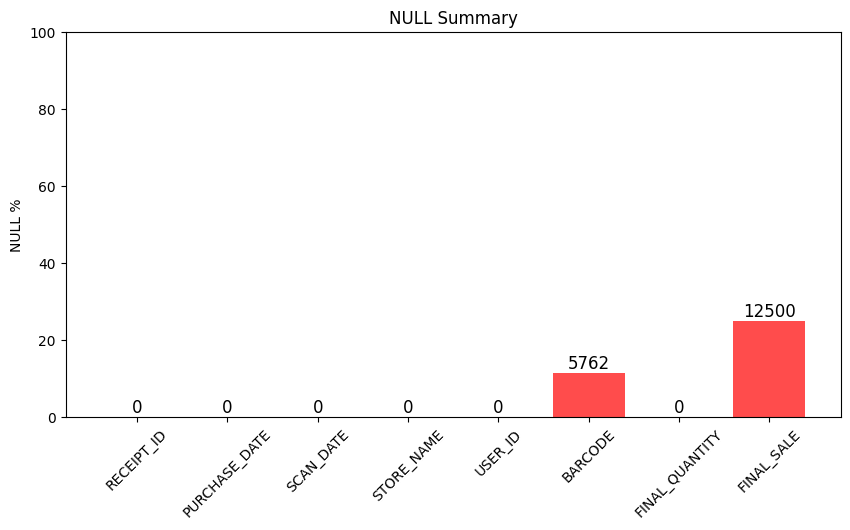

In [ ]:
# NULL Summary

# count the number of nulls and specify as a percentage for each column
null_counts = transactions.isnull().sum()
null_percentage = (null_counts / len(transactions)) * 100

# combine both into a DataFrame
null_summary = pd.DataFrame({'Null Count': null_counts, 'Percentage Missing': null_percentage})

# display results
plt.figure(figsize=(10, 5))
bars = plt.bar(null_summary.index, null_summary["Percentage Missing"], color="red", alpha=0.7)

# add labels for null counts on top of each bar
for bar, count in zip(bars, null_summary["Null Count"]):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f"{count}", ha='center', va='bottom', fontsize=12, color="black")

# set y-axis limit to 0-100
plt.ylim(0, 100)

plt.xticks(rotation=45)
plt.ylabel("NULL %")
plt.title("NULL Summary")
plt.show()

# USERS TABLE

In [ ]:
users.head(10)

,ID,CREATED_DATE,BIRTH_DATE,STATE,LANGUAGE,GENDER
0,5ef3b4f17053ab141787697d,2020-06-24 20:17:54.000 Z,2000-08-11 00:00:00.000 Z,CA,es-419,female
1,5ff220d383fcfc12622b96bc,2021-01-03 19:53:55.000 Z,2001-09-24 04:00:00.000 Z,PA,en,female
2,6477950aa55bb77a0e27ee10,2023-05-31 18:42:18.000 Z,1994-10-28 00:00:00.000 Z,FL,es-419,female
3,658a306e99b40f103b63ccf8,2023-12-26 01:46:22.000 Z,NaN,NC,en,NaN
4,653cf5d6a225ea102b7ecdc2,2023-10-28 11:51:50.000 Z,1972-03-19 00:00:00.000 Z,PA,en,female
5,5fe2b6f3ad416a1265c4ab68,2020-12-23 03:18:11.000 Z,1999-10-27 04:00:00.000 Z,NY,en,female
6,651210546816bb4d035b1ead,2023-09-25 22:57:24.000 Z,1983-09-25 22:57:25.000 Z,FL,es-419,male
7,642831ea3d4434e63c1936fd,2023-04-01 13:30:18.000 Z,1970-02-16 05:00:00.000 Z,IN,en,female
8,63a4c9a1b5f32149b9d82f9e,2022-12-22 21:18:25.000 Z,1982-12-22 05:00:00.000 Z,NC,en,female
9,63654b21d02459d8a57a2e2c,2022-11-04 17:25:53.000 Z,1992-05-03 04:00:00.000 Z,NY,en,non_binary


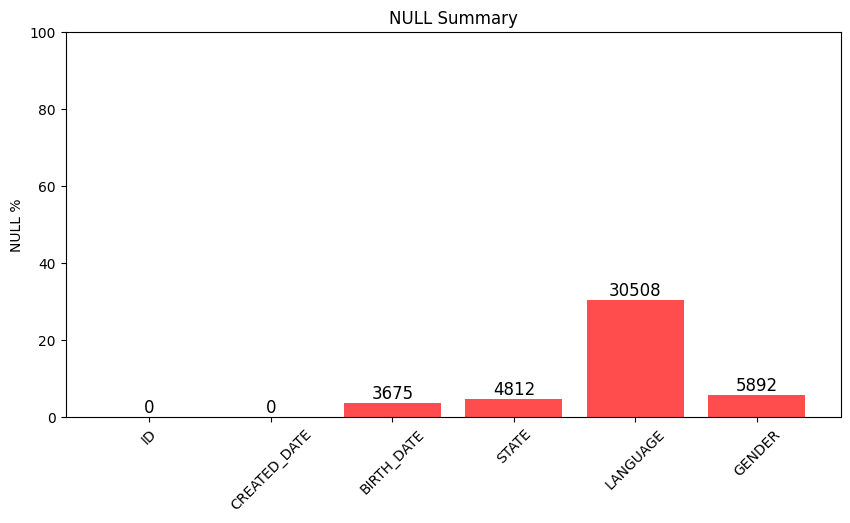

In [ ]:
# NULL Summary

# count the number of nulls and specify as a percentage for each column
null_counts = users.isnull().sum()
null_percentage = (null_counts / len(users)) * 100

# combine both into a DataFrame
null_summary = pd.DataFrame({'Null Count': null_counts, 'Percentage Missing': null_percentage})

# display results
plt.figure(figsize=(10, 5))
bars = plt.bar(null_summary.index, null_summary["Percentage Missing"], color="red", alpha=0.7)

# add labels for null counts on top of each bar
for bar, count in zip(bars, null_summary["Null Count"]):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f"{count}", ha='center', va='bottom', fontsize=12, color="black")

# set y-axis limit to 0-100
plt.ylim(0, 100)

plt.xticks(rotation=45)
plt.ylabel("NULL %")
plt.title("NULL Summary")
plt.show()

# JOINING TABLES

In [ ]:
# ensuring that all the variables are in correct data type

users['ID'] = users['ID'].astype(str)
transactions['USER_ID'] = transactions['USER_ID'].astype(str)
transactions['BARCODE'] = transactions['BARCODE'].astype(str)

# Convert barcode to integer (removing scientific notation) and then to string
products['BARCODE'] = products['BARCODE'].apply(lambda x: '{:.0f}'.format(x) if pd.notna(x) else x)
products['BARCODE'] = products['BARCODE'].astype(str)

In [ ]:
# merging transactions with users
common_tx_users = transactions.merge(users, left_on='USER_ID', right_on='ID', how='inner')
count_common_tx_users = len(common_tx_users)

# merging transactions with products
common_tx_products = transactions.merge(products, left_on='BARCODE', right_on='BARCODE', how='inner')
count_common_tx_products = len(common_tx_products)

# merging all three tables together
common_all = transactions.merge(users, left_on='USER_ID', right_on='ID', how='inner') \
                         .merge(products, left_on='BARCODE', right_on='BARCODE', how='inner')
count_common_all = len(common_all)

# print the results
print(f"Common rows between Transactions and Users: {count_common_tx_users}")
print(f"Common rows between Transactions and Products: {count_common_tx_products}")
print(f"Common rows between Transactions, Products, and Users: {count_common_all}")

Common rows between Transactions and Users: 262
Common rows between Transactions and Products: 24854
Common rows between Transactions, Products, and Users: 144


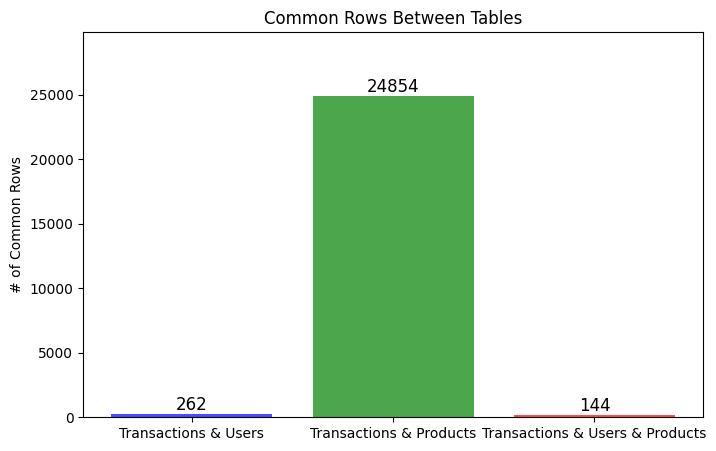

In [ ]:
# visualize the results

categories = ["Transactions & Users", "Transactions & Products", "Transactions & Users & Products"]
counts = [count_common_tx_users, count_common_tx_products, count_common_all]

# create bar chart
plt.figure(figsize=(8, 5))
bars = plt.bar(categories, counts, color=['blue', 'green', 'red'], alpha=0.7)

# add labels on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f"{yval}", ha='center', va='bottom', fontsize=12, color="black")

# labels and title
plt.ylabel("# of Common Rows")
plt.title("Common Rows Between Tables")
plt.ylim(0, max(counts) * 1.2)  # Add some space above the highest bar

# Show plot
plt.show()